# **Jupyter Notebook Code**

## Author
Amirhossein Ojaghi<br>
GitHub: [AH-ojaghi/Titanic-Survival-Analysis](https://github.com/AH-ojaghi/Titanic-Survival-Analysis)


#### Import necessary libraries


In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Load the dataset


In [273]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)


#### Display basic information about the dataset


In [274]:
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nSummary statistics:")
print(data.describe())



First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

#### Check for missing values


In [275]:
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Cleaning
#### Fill missing 'Age' with the median value


In [276]:
data['Age'].fillna(data['Age'].median(), inplace=True)



C:\Users\lenovo\AppData\Local\Temp\ipykernel_17068\1858461332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


#### Fill missing 'Embarked' with the most common value


In [277]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17068\3009432728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


#### Drop the 'Cabin' column as it has too many missing values


In [278]:
data.drop('Cabin', axis=1, inplace=True)


#### Check missing values after cleaning


In [279]:
print("\nMissing values after cleaning:")
print(data.isnull().sum())



Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Data Visualization
#### 1. Survival Count

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17068\3084705857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2', legend=False)


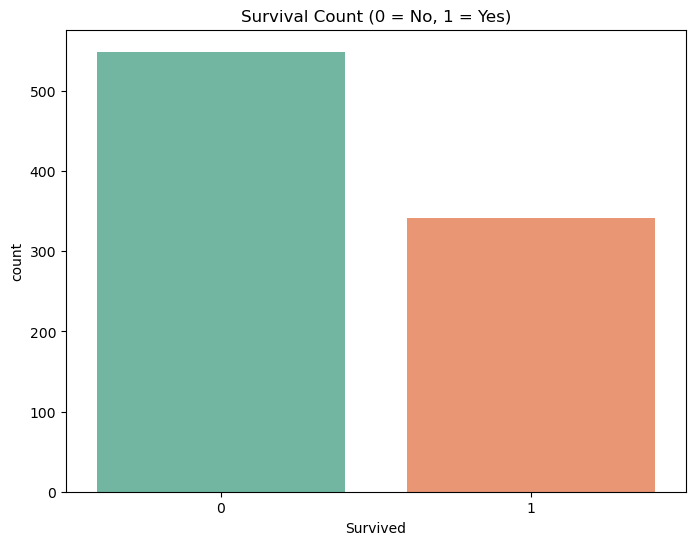

In [280]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data, palette='Set2', legend=False)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()


#### 2. Survival by Gender


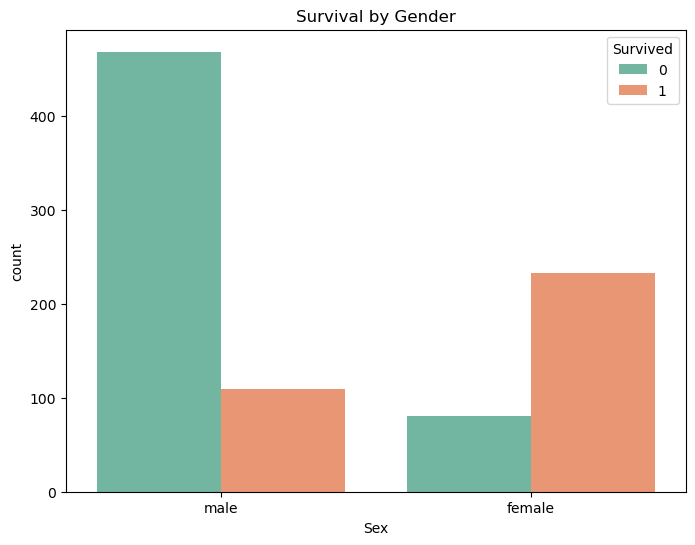

In [281]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='Set2')
plt.title('Survival by Gender')
plt.show()


#### 3. Survival by Passenger Class


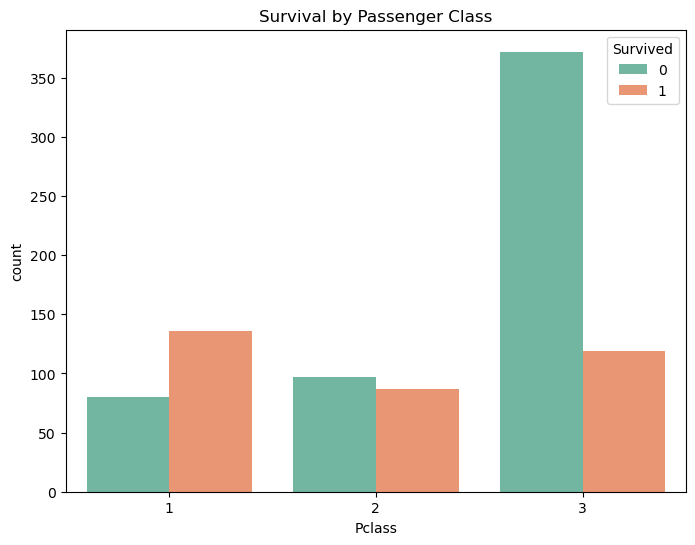

In [282]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set2')
plt.title('Survival by Passenger Class')
plt.show()


#### 4. Age Distribution


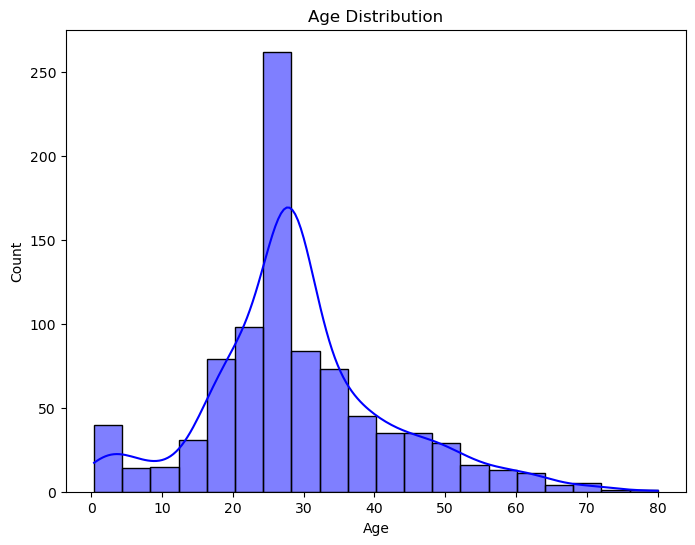

In [283]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()



#### 5. Fare Distribution


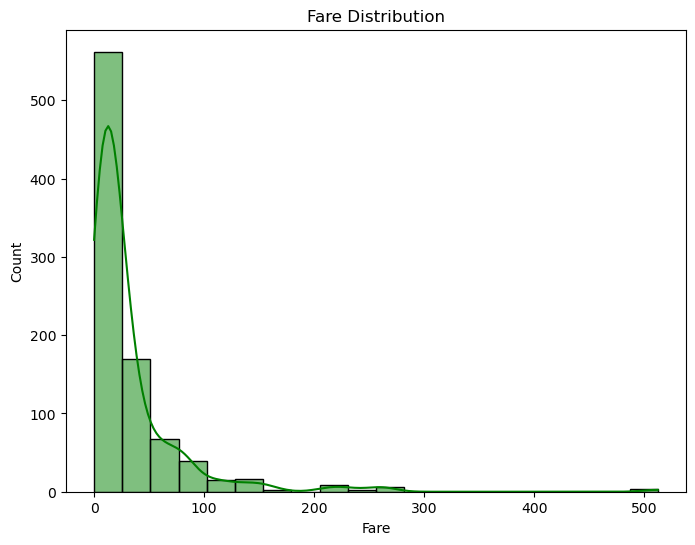

In [284]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], bins=20, kde=True, color='green')
plt.title('Fare Distribution')
plt.show()


#### 6. Correlation Heatmap


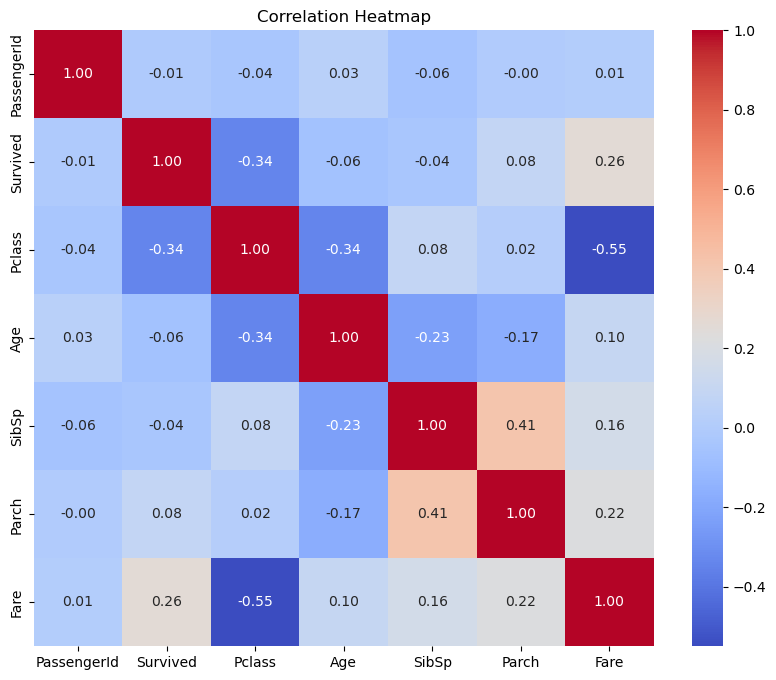

In [285]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### 7. Survival by Age and Gender


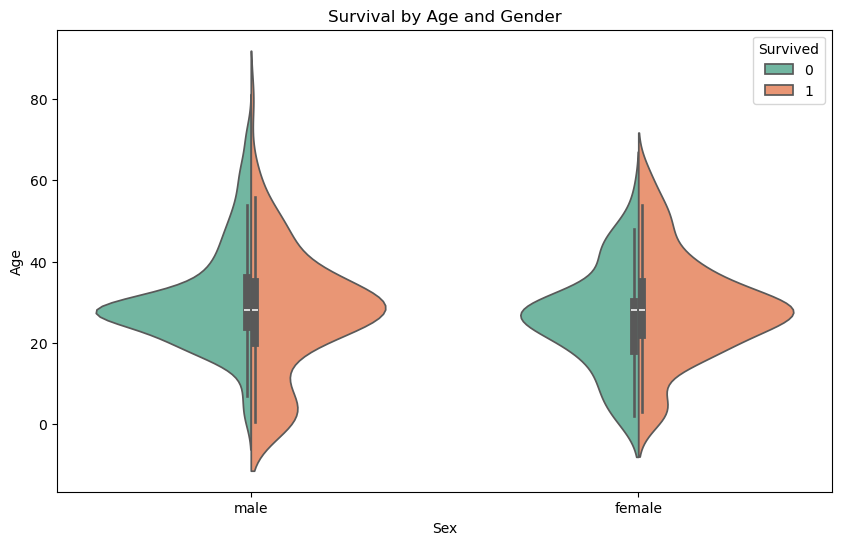

In [286]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, palette='Set2')
plt.title('Survival by Age and Gender')
plt.show()


#### 8. Survival by Embarked Port


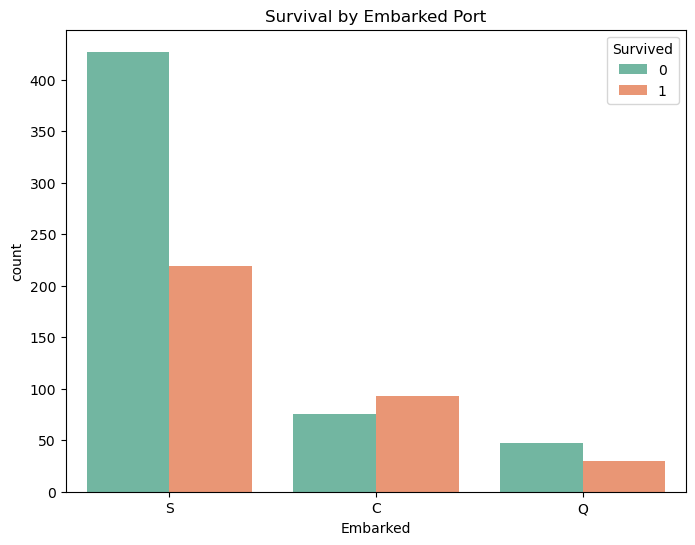

In [287]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=data, palette='Set2')
plt.title('Survival by Embarked Port')
plt.show()


#### 9. Family Size Analysis


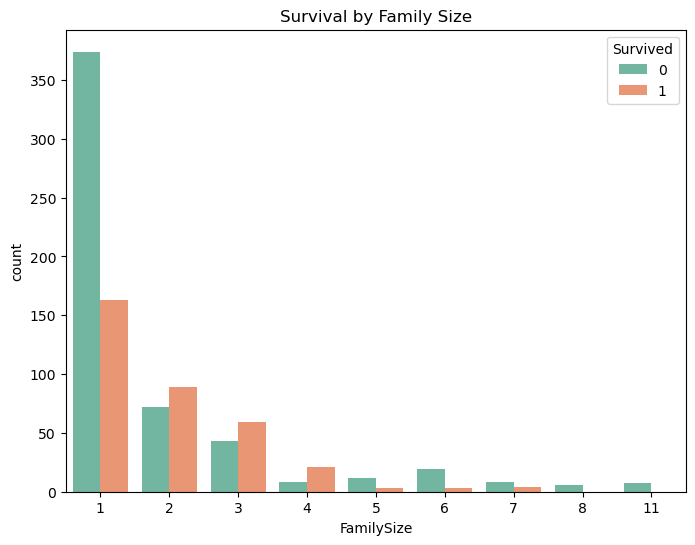

In [288]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
plt.figure(figsize=(8, 6))
sns.countplot(x='FamilySize', hue='Survived', data=data, palette='Set2')
plt.title('Survival by Family Size')
plt.show()


#### 10. Fare vs. Survival


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17068\2409959344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2')


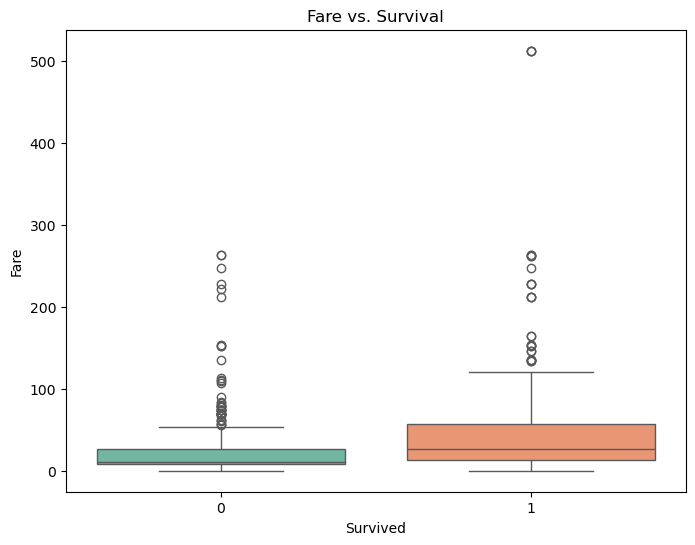

In [289]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2')
plt.title('Fare vs. Survival')
plt.show()